# <center>Salud mental y uso de redes sociales
## <center>Proyecto Final PCD 


El notebook es la parte codigo del proyecto final para programacion para ciencia de datos.

El caso a analziar es el de la relacion entre la salud mental de las personas y el uso de las redes sociales. Las principales ideas que se exploran es de el tiempo de uso al idea de estas y de conductas de depresion, faltas de distraccion, baja autoestima y problemas del sueno. 

Los datos se obtuvieron de un dataset de kaggle titulado "Social Media and Mental Health", https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health. A este dataset, se le realizaron transformaciones y modificaiones utilizando las librerias de pandas y numpy.

Se realizaron graficas para visualizar los datos obtenidos del dataset utilizando las librerias matplotlib y seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Generar dataFrame
SMhealth_df = pd.read_csv('smmh.csv')

# Eliminar columnas que no se usaran
SMhealth_df = SMhealth_df.drop(['Timestamp', '5. What type of organizations are you affiliated with?', ], axis=1)


In [4]:
#Eliminar a todos los que no usen redes sociales
SMhealth_df = SMhealth_df[SMhealth_df['6. Do you use social media?'] != 'No']
# Renombrar 'Less than an hour' a '.Less than an hour', para que salga en orden correcto
SMhealth_df['8. What is the average time you spend on social media every day?'] = SMhealth_df['8. What is the average time you spend on social media every day?'].replace('Less than an Hour', '.Less than an Hour')


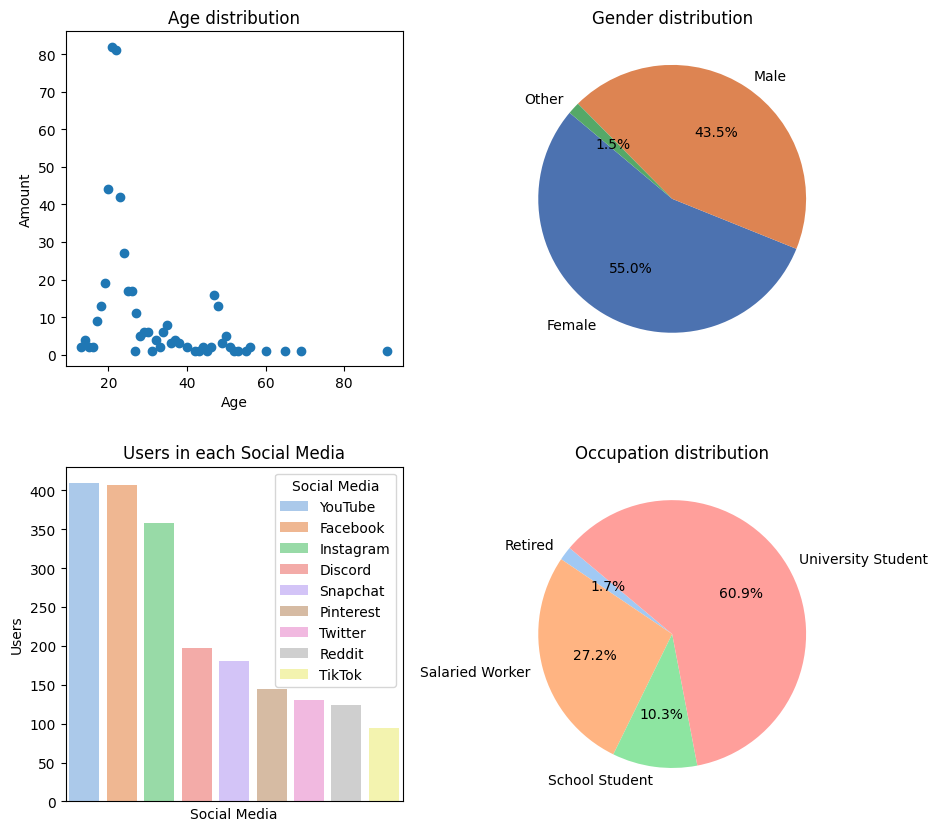

In [78]:
# Distribucion de edades que usan redes sociales
AgeTime_df = SMhealth_df[['1. What is your age?', '8. What is the average time you spend on social media every day?']]
age_counts = AgeTime_df['1. What is your age?'].value_counts().sort_index()

# Distribucion de generos del dataset
not_male_female = ~SMhealth_df['2. Gender'].isin(['Male', 'Female'])
SMhealth_df.loc[not_male_female, '2. Gender'] = 'Other'
gender_count = SMhealth_df['2. Gender'].value_counts().sort_index()

# Distribcion deocupacion del dataset
occupation_count = SMhealth_df['4. Occupation Status'].value_counts().sort_index()

# Usuarios de red social en dataset
socialM_df = SMhealth_df['7. What social media platforms do you commonly use?'].str.split(',').explode().str.strip()
socialM_counts = SocialM_df.value_counts().reset_index()
socialM_counts.columns = ['Social Media', 'Users']

# hacer subpltos de 2x2
fig, axes = plt.subplots(2, 2, figsize=(10,10))

#Hacer plot (0,0) de distribucion de edades con scatter plot
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Amount')
axes[0,0].set_title('Age distribution')
axes[0,0].scatter(age_counts.index, age_counts.values)

# Hacer plot (0,1) de distribucion de generos con pie
axes[0,1].pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep'))
axes[0,1].set_title('Gender distribution')

# Hacer plot (1,0) de usuarios en cada red social con barplot
sns.barplot(x='Social Media', y='Users', data=socialM_counts,hue='Social Media',legend=True, palette='pastel', ax=axes[1,0])
axes[1,0].set_xticks([])
axes[1,0].set_title('Users in each Social Media')
axes[1,0].legend(title='Social Media', loc='upper right')

# Hacer plot (1,1) de distribucion de ocupacion con pie
axes[1,1].pie(occupation_count.values, labels=occupation_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1,1].set_title('Occupation distribution')

# Ajustar espacio entre plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

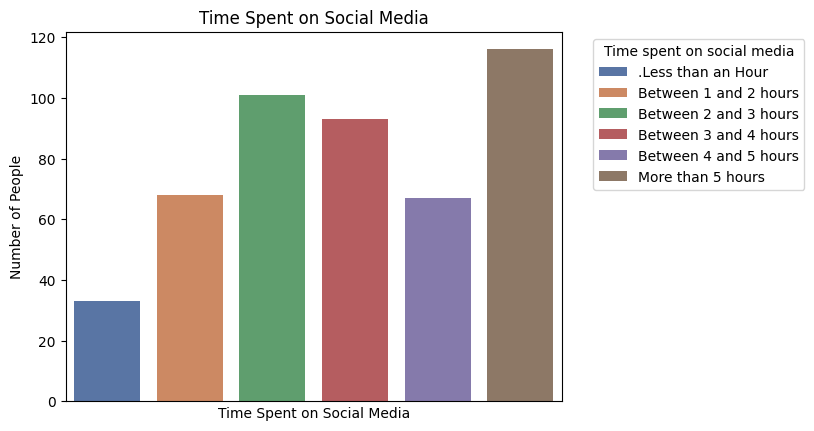

In [46]:
# crear dataframe timeSpent donde se tiene el tiempo que se usa una red social y cuatnas personas la usan durante ese tiempo
time_counts = AgeTime_df['8. What is the average time you spend on social media every day?'].value_counts().sort_index()
timeSpent_df = time_counts.reset_index()
timeSpent_df.columns = ['Time spent on social media','Number of people']

# hacer plot del timeSpent_df con barplot
sns.barplot(x='Time spent on social media', y='Number of people', data=timeSpent_df ,legend=True, palette='deep', hue = 'Time spent on social media')
plt.xticks([])

plt.xlabel('Time Spent on Social Media')
plt.ylabel('Number of People')
plt.title("Time Spent on Social Media")

plt.legend(title='Time spent on social media', bbox_to_anchor=(1.05, 1), loc='upper left')


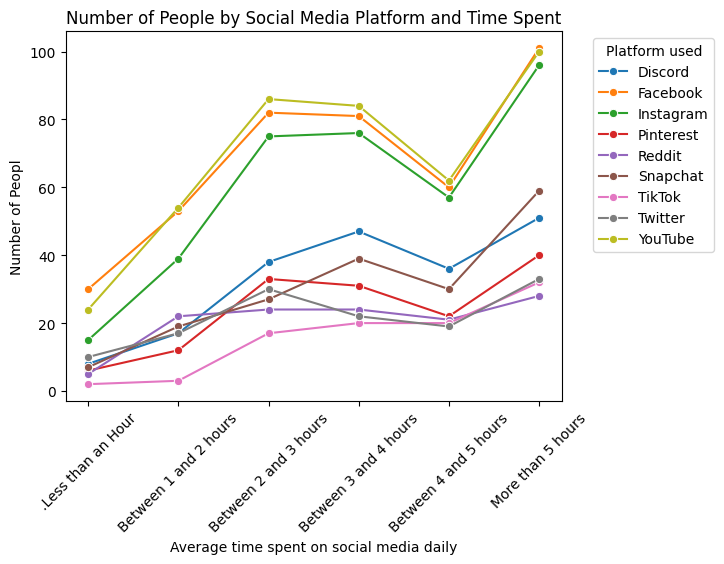

In [121]:
# Generar un dataframe al separar las redes sociales de la columna con las plataformas utilziadas e indicar el rango de horas que son utilizadas.
usageMedia_df = SMhealth_df[['8. What is the average time you spend on social media every day?','7. What social media platforms do you commonly use?']]
usageMedia_df = usageMedia_df.rename(columns={'8. What is the average time you spend on social media every day?':'Average time spent on social media daily', '7. What social media platforms do you commonly use?':'Platform used'})
media_df = usageMedia_df['Platform used'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Platform used')
usageMedia_df = usageMedia_df.drop('Platform used', axis=1).join(media_df)
usageMedia_df = usageMedia_df.reset_index(drop=True)

usageMedia_df = usageMedia_df.sort_values(by='Average time spent on social media daily')
usageMedia_df = usageMedia_df.groupby(['Average time spent on social media daily', 'Platform used']).size().reset_index(name='count')

sns.lineplot(x='Average time spent on social media daily', hue='Platform used',y='count', data=usageMedia_df, marker='o')

plt.xlabel("Average time spent on social media daily")
plt.ylabel("Number of Peopl")
plt.title("Number of People by Social Media Platform and Time Spent")

plt.xticks(rotation=45)
plt.legend(title='Platform used', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

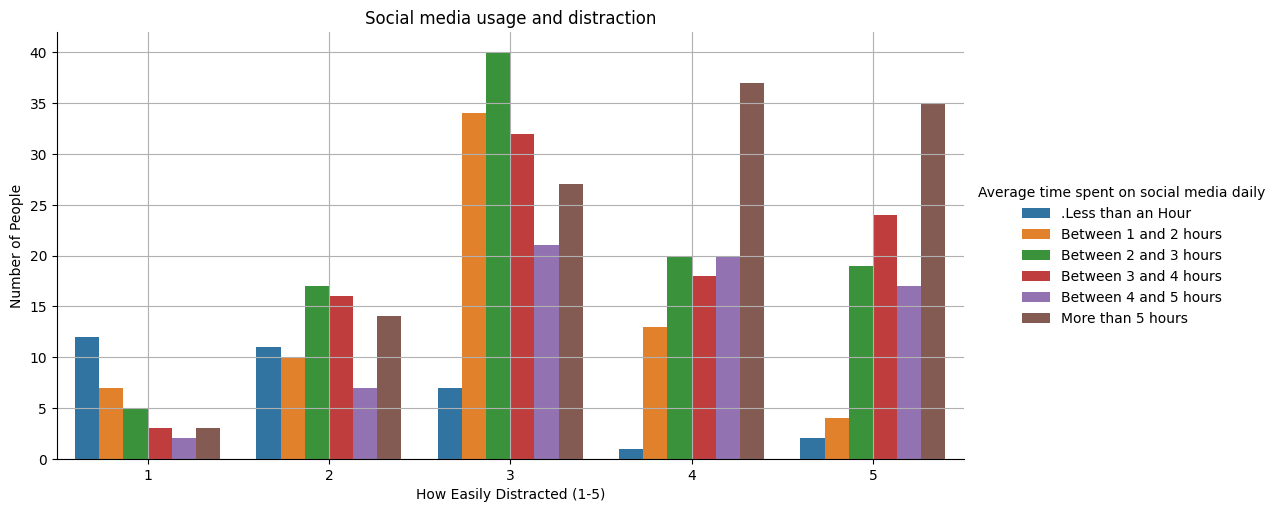

In [9]:
# Datos para comparar el tiempo de uso de una red social y la distraccion de las personas.
SMhealth_df['8. What is the average time you spend on social media every day?'] = SMhealth_df['8. What is the average time you spend on social media every day?'].replace('Less than an Hour', '.Less than an Hour')
distractionGrouped_df = SMhealth_df.groupby(['12. On a scale of 1 to 5, how easily distracted are you?', '8. What is the average time you spend on social media every day?']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
distractionGrouped_df=distractionGrouped_df.rename(columns={'8. What is the average time you spend on social media every day?':'Average time spent on social media daily'})

#Hacer plot del dataframe con catplot
sns.catplot(x='12. On a scale of 1 to 5, how easily distracted are you?', y='count', hue='Average time spent on social media daily', data=distractionGrouped_df, kind='bar', height=5, aspect=2)
plt.xlabel('How Easily Distracted (1-5)')
plt.ylabel('Number of People')
plt.title('Social media usage and distraction')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4', '5'])
plt.grid(True)

<Figure size 1200x600 with 0 Axes>

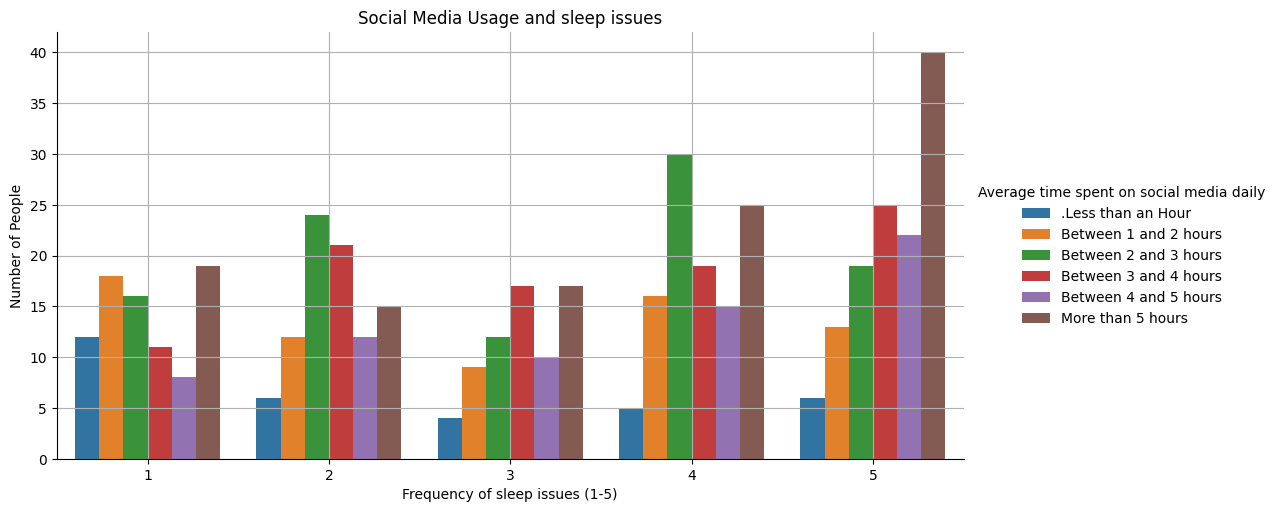

In [10]:
# Datos para comparar el tiempo de uso de una red social y problemas del sueno de las personas.
sleepGrouped_df = SMhealth_df.groupby(['20. On a scale of 1 to 5, how often do you face issues regarding sleep?', '8. What is the average time you spend on social media every day?']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sleepGrouped_df=sleepGrouped_df.rename(columns={'8. What is the average time you spend on social media every day?':'Average time spent on social media daily'})

# Hacer plot del dataframe con catplot
sns.catplot(x='20. On a scale of 1 to 5, how often do you face issues regarding sleep?', y='count', hue='Average time spent on social media daily', data=sleepGrouped_df, kind='bar', height=5, aspect=2)
plt.xlabel('Frequency of sleep issues (1-5)')
plt.ylabel('Number of People')
plt.title('Social Media Usage and sleep issues')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4', '5'])
plt.grid(True)

<Figure size 1200x600 with 0 Axes>

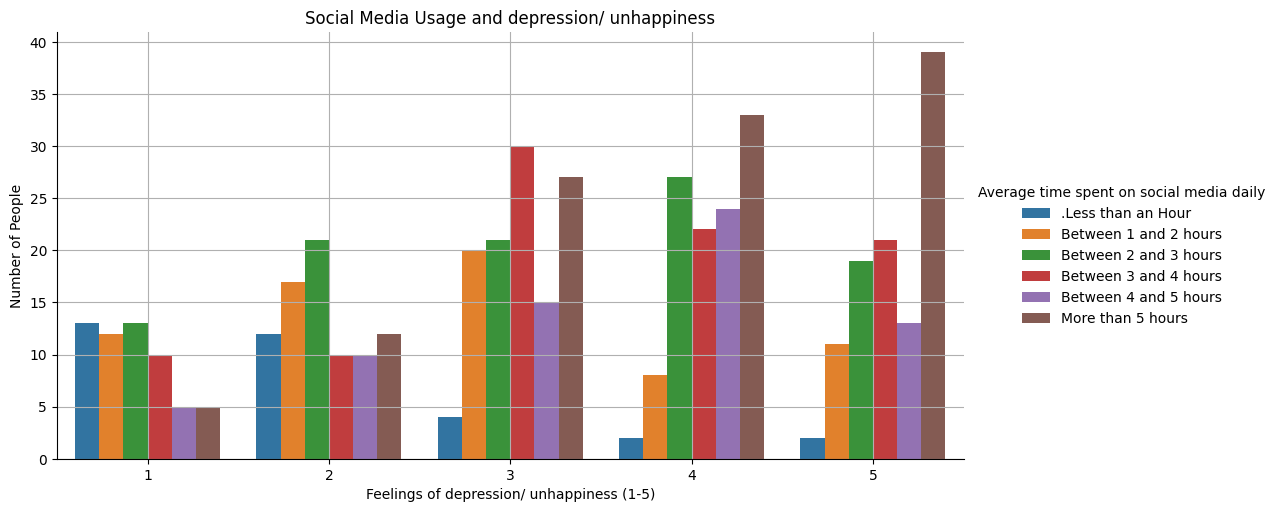

In [11]:
# Datos para comparar el tiempo de uso de una red social y depresion
depressionGrouped_df = SMhealth_df.groupby(['18. How often do you feel depressed or down?', '8. What is the average time you spend on social media every day?']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
depressionGrouped_df=depressionGrouped_df.rename(columns={'8. What is the average time you spend on social media every day?':'Average time spent on social media daily'})

#Hacer plot del dataframe con catplot
sns.catplot(x='18. How often do you feel depressed or down?', y='count', hue='Average time spent on social media daily', data=depressionGrouped_df, kind='bar', height=5, aspect=2)
plt.xlabel('Feelings of depression/ unhappiness (1-5)')
plt.ylabel('Number of People')
plt.title('Social Media Usage and depression/ unhappiness')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4', '5'])
plt.grid(True)

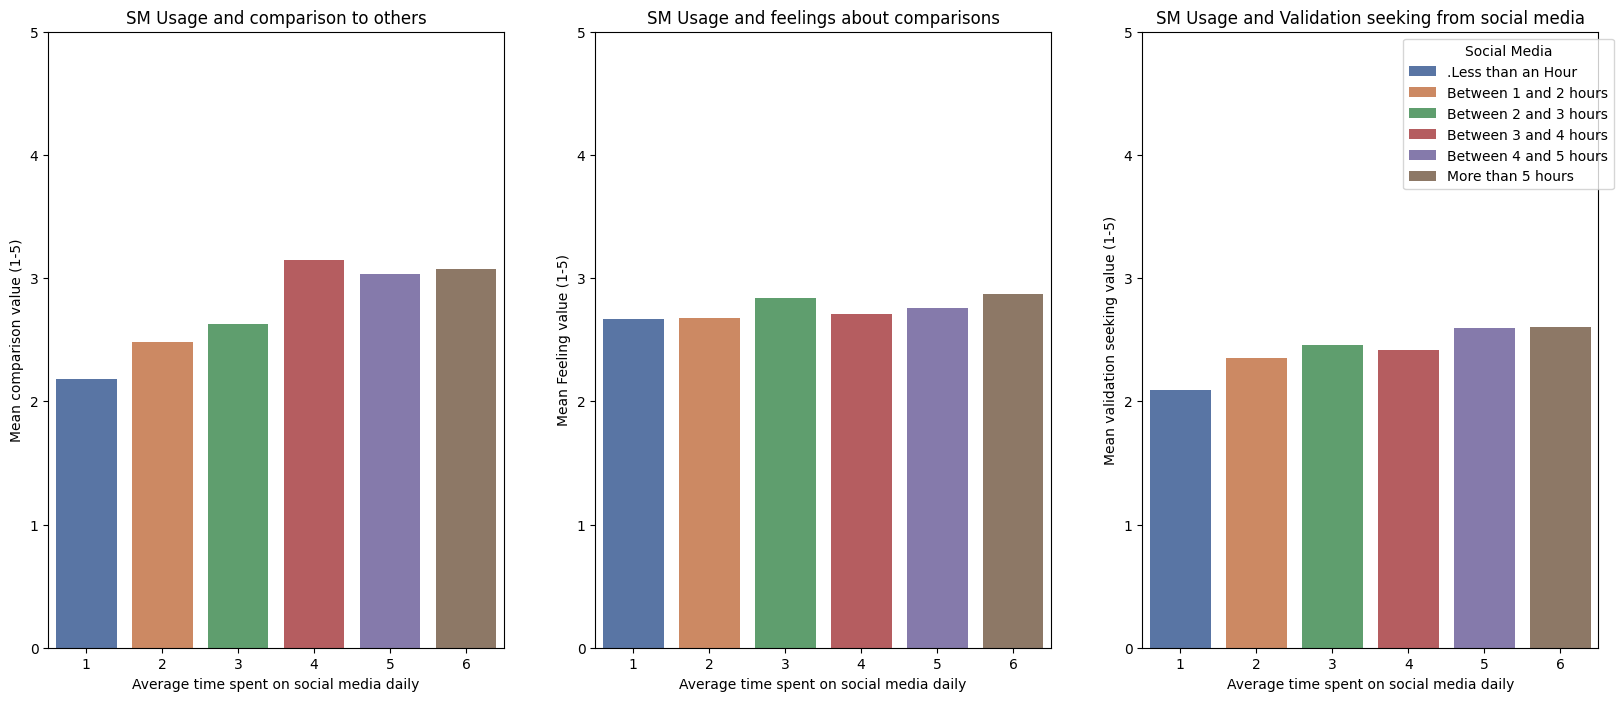

In [120]:
comparison_df = SMhealth_df.rename(columns={'15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Comparison to others'})
comparison_df = comparison_df.rename(columns={'8. What is the average time you spend on social media every day?':'Average time spent on social media daily', '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Feelings about comparisons','17. How often do you look to seek validation from features of social media?':'Validation seeking from social media'})

comparison_Others = comparison_df.groupby('Average time spent on social media daily')['Comparison to others'].mean()
comparison_Feelings = comparison_df.groupby('Average time spent on social media daily')['Feelings about comparisons'].mean()
comparison_Validation = comparison_df.groupby('Average time spent on social media daily')['Validation seeking from social media'].mean()

#Crear subplots de 1 renglon y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# hacer barplot de uso de redes sociales y cuanto se comapran con otros
sns.barplot(x=comparison_Others.index, y=comparison_Others.values, ax=axes[0],legend=False, palette='deep', hue=comparison_Validation.index)
axes[0].set_xlabel('Average time spent on social media daily')
axes[0].set_ylabel('Mean comparison value (1-5)')
axes[0].set_title('SM Usage and comparison to others')
axes[0].set_ylim(0,5)

# Hacer barplot  de uso de redes sociales y el como son los sentimientos cuando se comapran
sns.barplot(x=comparison_Feelings.index, y=comparison_Feelings.values, ax=axes[1],legend=False, palette='deep', hue=comparison_Validation.index)
axes[1].set_xlabel('Average time spent on social media daily')
axes[1].set_ylabel('Mean Feeling value (1-5)')
axes[1].set_title('SM Usage and feelings about comparisons')
axes[1].set_ylim(0,5)

# Hacer barplot de uso de redes sociales y la validacion que buscan de redes sociales
sns.barplot(x=comparison_Validation.index, y=comparison_Validation.values, ax=axes[2],legend=True, palette='deep', hue=comparison_Validation.index)
axes[2].set_xlabel('Average time spent on social media daily')
axes[2].set_ylabel('Mean validation seeking value (1-5)')
axes[2].set_title('SM Usage and Validation seeking from social media')
axes[2].set_ylim(0,5)
axes[2].legend(title='Social Media',bbox_to_anchor=(1.05,1), loc='upper right')

# Remover los valroes de los indices del eje x
for i in range(0,3):
    axes[i].set_xticks([0,1,2,3,4,5])
    axes[i].set_xticklabels([1,2,3,4,5,6])
